In [1]:
import pandas as pd
import numpy as np

electricity_production = pd.read_csv(r"C:\Users\Tyler\Downloads\Electricity_Production_By_Source.csv")
electricity_production.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0


In [2]:
# electricity_production.info()
electricity_production['Year'].astype('int')
electricity_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   6241 non-null   object 
 1   Code                                     5474 non-null   object 
 2   Year                                     6241 non-null   int64  
 3   Electricity from coal (TWh)              5221 non-null   float64
 4   Electricity from gas (TWh)               5221 non-null   float64
 5   Electricity from hydro (TWh)             6241 non-null   float64
 6   Electricity from other renewables (TWh)  6206 non-null   float64
 7   Electricity from solar (TWh)             6241 non-null   float64
 8   Electricity from oil (TWh)               5221 non-null   float64
 9   Electricity from wind (TWh)              6241 non-null   float64
 10  Electricity from nuclear (TWh)           6241 no

In [3]:
def filling_missing(df, column):
    mean = df[column].mean()
    std = df[column].std()
    minimum_value = 0
    missing_values = df[column].isna().sum()
    rng = np.random.default_rng()
    random_values = rng.integers(low = minimum_value, high = mean + std, size = missing_values)
    df.loc[df[column].isna(), column] = random_values

In [4]:
filling_missing(electricity_production, 'Electricity from coal (TWh)')
filling_missing(electricity_production, 'Electricity from gas (TWh)')
filling_missing(electricity_production, 'Electricity from other renewables (TWh)')
filling_missing(electricity_production, 'Electricity from oil (TWh)')
electricity_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   6241 non-null   object 
 1   Code                                     5474 non-null   object 
 2   Year                                     6241 non-null   int64  
 3   Electricity from coal (TWh)              6241 non-null   float64
 4   Electricity from gas (TWh)               6241 non-null   float64
 5   Electricity from hydro (TWh)             6241 non-null   float64
 6   Electricity from other renewables (TWh)  6241 non-null   float64
 7   Electricity from solar (TWh)             6241 non-null   float64
 8   Electricity from oil (TWh)               6241 non-null   float64
 9   Electricity from wind (TWh)              6241 non-null   float64
 10  Electricity from nuclear (TWh)           6241 no

In [5]:
electricity_value = electricity_production.iloc[:, 3:]
electricity_production['Total electricity produced'] = electricity_value.sum(axis=1)
electricity_production.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Total electricity produced
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0,0.467
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0,0.592
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0,0.687
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0,0.939
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0,0.894


In [6]:
oldest_year = electricity_production['Year'].min()
entity_back_to_1985 = electricity_production[electricity_production['Year'] == oldest_year]
countries_back_to_1985 = electricity_production[electricity_production['Entity'].isin(entity_back_to_1985['Entity'])]
countries_back_to_1985.reset_index(drop=True, inplace=True)
world_electricity_produced = electricity_production[electricity_production['Entity']=='World']

renew = [world_electricity_produced['Electricity from hydro (TWh)'],
 world_electricity_produced['Electricity from solar (TWh)'],
 world_electricity_produced['Electricity from wind (TWh)'], 
 world_electricity_produced['Electricity from other renewables (TWh)']]

world_electricity_produced['Total electricity by renewables'] = sum(renew)


<ipython-input-6-280246269df2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_electricity_produced['Total electricity by renewables'] = sum(renew)


In [7]:
countries_back_to_1985 = countries_back_to_1985[countries_back_to_1985['Entity'] != 'World']


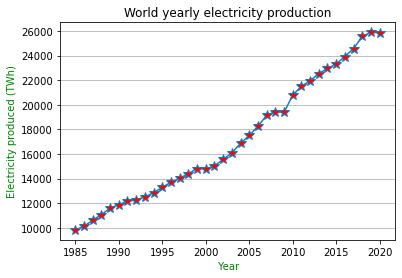

In [8]:
import matplotlib.pyplot as plt

plt.plot(world_electricity_produced['Year'], world_electricity_produced['Total electricity produced'], marker='*',
        mfc = 'r', ms=10)
plt.grid(axis='y')
plt.title('World yearly electricity production')
plt.xlabel(' Year', c='g')
plt.ylabel('Electricity produced (TWh)', c='g')
plt.show()

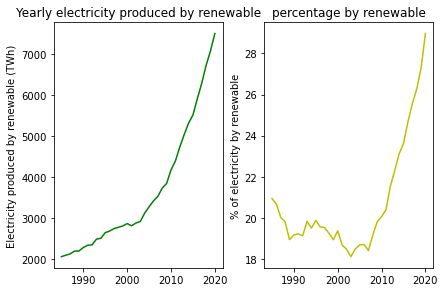

In [9]:
perc_world = 100*(world_electricity_produced['Total electricity by renewables'] / world_electricity_produced['Total electricity produced'])

fig, axs = plt.subplots(1, 2)
fig.tight_layout()
axs[0].plot(world_electricity_produced['Year'], world_electricity_produced['Total electricity by renewables'], c='g')
# axs[0].set_xticklabels(world_electricity_produced['Year'], rotation=90)
axs[0].set_title('Yearly electricity produced by renewable')
axs[0].set_ylabel('Electricity produced by renewable (TWh)')

axs[1].plot(world_electricity_produced['Year'], perc_world, c='y')
axs[1].set_title('percentage by renewable')
axs[1].set_ylabel('% of electricity by renewable')
plt.show()

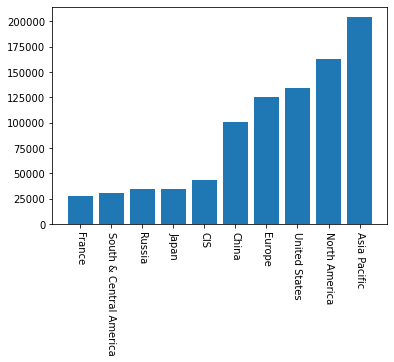

In [10]:
top_10_entity = countries_back_to_1985.groupby('Entity')['Total electricity produced'].sum().nlargest(10).sort_values()

plt.bar(top_10_entity.index, top_10_entity)
plt.xticks(rotation=270)
plt.show()

<ipython-input-11-0b2f07a9e468>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(sorted_electricity_asia.index, rotation=90)
<ipython-input-11-0b2f07a9e468>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(sorted_electricity_NA.index, rotation=90)


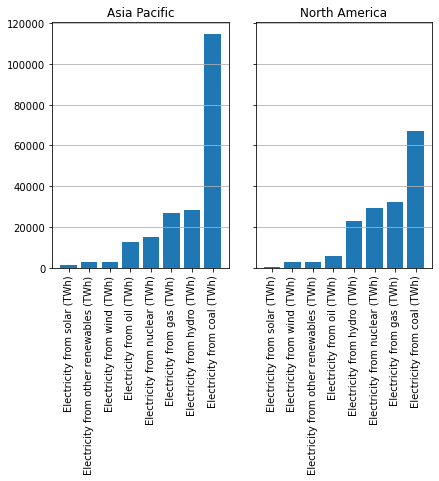

In [11]:
asia_pacific = countries_back_to_1985[countries_back_to_1985['Entity']=='Asia Pacific'].sum(axis=0)
# print(asia_pacific)
sorted_electricity_asia = asia_pacific[3:11].sort_values()
North_America = countries_back_to_1985[countries_back_to_1985['Entity']=='North America'].sum(axis=0)
sorted_electricity_NA = North_America[3:11].sort_values()


fig, axs = plt.subplots(1, 2, sharey=True)
fig.tight_layout()
axs[0].bar(sorted_electricity_asia.index, sorted_electricity_asia)
axs[1].bar(sorted_electricity_NA.index, sorted_electricity_NA)

# axs[0].xticks(rotation=90)
axs[0].set_title('Asia Pacific')
axs[0].set_xticklabels(sorted_electricity_asia.index, rotation=90)
axs[1].set_title('North America')
axs[1].set_xticklabels(sorted_electricity_NA.index, rotation=90)
axs[0].grid(axis='y')
axs[1].grid(axis='y')
plt.show()

In [12]:
reliance_on_coal_AP = 100 *(sorted_electricity_asia[-1] / asia_pacific[-1])
reliance_on_coal_NA = 100 *(sorted_electricity_NA[-1] / North_America[-1])
print(reliance_on_coal_AP,reliance_on_coal_NA)

56.157262839310526 41.1170089340513


Asia Pacific relies over half of its electricity production on coal, while North America only relies on coal for 41% of its electricity production.

#### Electricity production over the year using coal between Asia Pacific, China, and North America

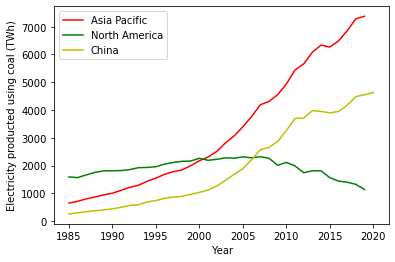

In [13]:
AP_coal_over_the_year = countries_back_to_1985[countries_back_to_1985['Entity']=='Asia Pacific']
NA_coal_over_the_year = countries_back_to_1985[countries_back_to_1985['Entity']=='North America']
China_coal_over_the_year = countries_back_to_1985[countries_back_to_1985['Entity']=='China']

plt.plot(AP_coal_over_the_year['Year'], AP_coal_over_the_year['Electricity from coal (TWh)'], c='r', label='Asia Pacific')
plt.plot(NA_coal_over_the_year['Year'], NA_coal_over_the_year['Electricity from coal (TWh)'], c='g', label='North America')
plt.plot(China_coal_over_the_year['Year'], China_coal_over_the_year['Electricity from coal (TWh)'], c='y', label='China')
plt.legend()
plt.xlabel(' Year')
plt.ylabel('Electricity producted using coal (TWh)')
plt.show()

### Electricity from renewables over the year

In [14]:
renewable = [countries_back_to_1985['Electricity from hydro (TWh)'],
 countries_back_to_1985['Electricity from solar (TWh)'],
 countries_back_to_1985['Electricity from wind (TWh)'], 
 countries_back_to_1985['Electricity from other renewables (TWh)']]
countries_back_to_1985['Total electricity from renewables energies'] = sum(renewable)

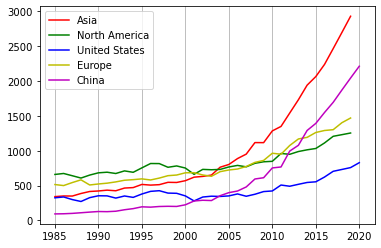

In [15]:
renewable_asia = countries_back_to_1985[countries_back_to_1985['Entity']=='Asia Pacific']
renewable_NA = countries_back_to_1985[countries_back_to_1985['Entity']=='North America']
renewable_US = countries_back_to_1985[countries_back_to_1985['Entity']=='United States']
renewable_Europe = countries_back_to_1985[countries_back_to_1985['Entity']=='Europe']
renewable_China = countries_back_to_1985[countries_back_to_1985['Entity']=='China']

year = list(pd.unique(countries_back_to_1985['Year']))
plt.plot(year[:35], renewable_asia['Total electricity from renewables energies'], c='r',label='Asia')
plt.plot(year[:35], renewable_NA['Total electricity from renewables energies'], c='g', label='North America')
plt.plot(year, renewable_US['Total electricity from renewables energies'], c='b', label='United States')
plt.plot(year[:35], renewable_Europe['Total electricity from renewables energies'], c='y', label='Europe')
plt.plot(year, renewable_China['Total electricity from renewables energies'], c='m', label='China')
plt.legend()
plt.grid(axis='x')
plt.show()

Note that Asia, Europe, and North America does not have record of 2020's electricity produced by renewable engergy

In [16]:
perc_asia = 100*(renewable_asia['Total electricity from renewables energies']/renewable_asia['Total electricity produced'])
perc_NA = 100*(renewable_NA['Total electricity from renewables energies'] / renewable_NA['Total electricity produced'])
perc_US = 100*(renewable_US['Total electricity from renewables energies'] / renewable_US['Total electricity produced'])
perc_Europe = 100*(renewable_Europe['Total electricity from renewables energies'] / renewable_Europe['Total electricity produced'])
perc_China = 100*(renewable_China['Total electricity from renewables energies'] / renewable_China['Total electricity produced'])

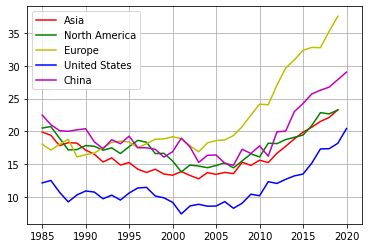

In [17]:
plt.plot(year[:35], perc_asia, c='r', label='Asia')
plt.plot(year[:35], perc_NA, c='g', label='North America')
plt.plot(year[:35], perc_Europe, c='y', label='Europe')
plt.plot(year, perc_US, c='b', label='United States')
plt.plot(year, perc_China, c='m', label='China')
plt.legend()
plt.grid()
plt.show()

The previous graph shows how much electricity is produced by renewable sources. It showed that Asia-Pacific has the most produce electricity using renewable sources from 2005 to 2019 and most likely 2020 as well. This graph shows the percentage of electricity responsible by renewable sources. It shows that about 37% (or 38%) of Europe's electricity is generated by renewable energies. 

### Countries that only has recorded electricity data back to 2000

In [18]:
countries_back_to_2000 = electricity_production[~(electricity_production['Entity'].isin(entity_back_to_1985['Entity']))]

columns_to_add = [countries_back_to_2000['Electricity from hydro (TWh)'],
 countries_back_to_2000['Electricity from solar (TWh)'],
 countries_back_to_2000['Electricity from wind (TWh)'], 
 countries_back_to_2000['Electricity from other renewables (TWh)']]

countries_back_to_2000['Total electricity by renewable'] = sum(columns_to_add)


<ipython-input-18-82380485514e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_back_to_2000['Total electricity by renewable'] = sum(columns_to_add)


In [19]:
divide = countries_back_to_2000['Total electricity by renewable'] / countries_back_to_2000['Total electricity produced']
countries_back_to_2000['percent_electricity_by_renewable'] = divide
stat_2000 = countries_back_to_2000.groupby('Entity').agg({'Total electricity produced':'sum', 
                                                       'Total electricity by renewable':'sum',
                                                        'percent_electricity_by_renewable' :'mean'})
top_10_electricity = stat_2000.nlargest(10, columns='Total electricity produced')
top_10_percent_renewable = stat_2000.nlargest(10, columns='percent_electricity_by_renewable')

<ipython-input-19-8f316569f6b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_back_to_2000['percent_electricity_by_renewable'] = divide


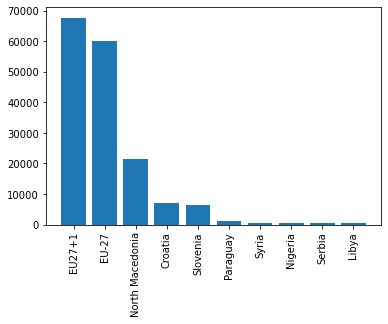

In [20]:
plt.bar(top_10_electricity.index, top_10_electricity['Total electricity produced'])
plt.xticks(rotation=90)
plt.show()

In [21]:
EU27_1 = countries_back_to_2000[countries_back_to_2000['Entity'] == 'EU27+1']

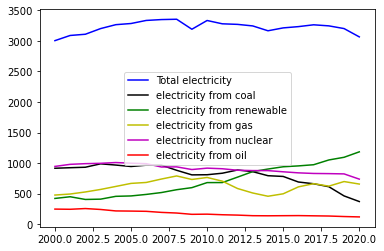

In [22]:
plt.plot(EU27_1['Year'], EU27_1['Total electricity produced'], c='b', label='Total electricity')
plt.plot(EU27_1['Year'], EU27_1['Electricity from coal (TWh)'], c='k', label='electricity from coal')
plt.plot(EU27_1['Year'], EU27_1['Total electricity by renewable'], c='g', label='electricity from renewable')
plt.plot(EU27_1['Year'], EU27_1['Electricity from gas (TWh)'], c='y', label='electricity from gas')
plt.plot(EU27_1['Year'], EU27_1['Electricity from nuclear (TWh)'], c='m', label='electricity from nuclear')
plt.plot(EU27_1['Year'], EU27_1['Electricity from oil (TWh)'], c='r', label='electricity from oil')
plt.legend()
plt.show()

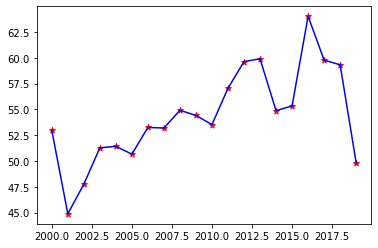

In [23]:
# top_10_percent_renewable
paraguay = countries_back_to_2000[countries_back_to_2000['Entity']=='Paraguay']

plt.scatter(paraguay['Year'], paraguay['Total electricity by renewable'], c='r', marker='*')
plt.plot(paraguay['Year'], paraguay['Total electricity produced'], c='b')
plt.show()

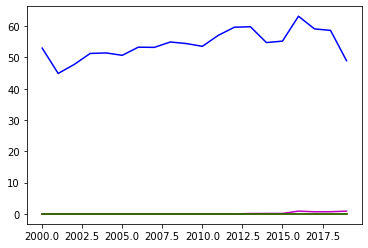

In [24]:
plt.plot(paraguay['Year'], paraguay['Electricity from hydro (TWh)'], c='b')
plt.plot(paraguay['Year'], paraguay['Electricity from other renewables (TWh)'], c='m')
plt.plot(paraguay['Year'], paraguay['Electricity from solar (TWh)'], c='r')
plt.plot(paraguay['Year'], paraguay['Electricity from wind (TWh)'], c='g')
plt.show()

It seems that almost all electricity that were produced by renewable sources in Paraguay comes from hydropower

#### All the entities that use renewable resources to provide over 50% of their total electricity production

In [25]:
over_50_percent = stat_2000[stat_2000['percent_electricity_by_renewable'] >= 0.5]
print(len(over_50_percent))

45


In [26]:
countries = ["Afghanistan","Albania","Algeria","Andorra","Angola","Antigua & Deps","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahamas","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia","Bosnia Herzegovina","Botswana","Brazil","Brunei","Bulgaria","Burkina","Burundi","Cambodia","Cameroon","Canada","Cape Verde","Central African Rep","Chad","Chile","China","Colombia","Comoros","Congo","Congo {Democratic Rep}","Costa Rica","Croatia","Cuba","Cyprus","Czech Republic","Denmark","Djibouti","Dominica","Dominican Republic","East Timor","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Ethiopia","Fiji","Finland","France","Gabon","Gambia","Georgia","Germany","Ghana","Greece","Grenada","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland {Republic}","Israel","Italy","Ivory Coast","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati","Korea North","Korea South","Kosovo","Kuwait","Kyrgyzstan","Laos","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Luxembourg","Macedonia","Madagascar","Malawi","Malaysia","Maldives","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Mexico","Micronesia","Moldova","Monaco","Mongolia","Montenegro","Morocco","Mozambique","Myanmar, {Burma}","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Palau","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal","Qatar","Romania","Russian Federation","Rwanda","St Kitts & Nevis","St Lucia","Saint Vincent & the Grenadines","Samoa","San Marino","Sao Tome & Principe","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Singapore","Slovakia","Slovenia","Solomon Islands","Somalia","South Africa","South Sudan","Spain","Sri Lanka","Sudan","Suriname","Swaziland","Sweden","Switzerland","Syria","Taiwan","Tajikistan","Tanzania","Thailand","Togo","Tonga","Trinidad & Tobago","Tunisia","Turkey","Turkmenistan","Tuvalu","Uganda","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan","Vanuatu","Vatican City","Venezuela","Vietnam","Yemen","Zambia","Zimbabwe"]

In [29]:
over_50_percent.reset_index(inplace=True)

In [33]:
countries_over_50_percent = over_50_percent[over_50_percent['Entity'].isin(countries)].sort_values(by='percent_electricity_by_renewable',
                                                                                                  ascending=False)
countries_over_50_percent

,Entity,Total electricity produced,Total electricity by renewable,percent_electricity_by_renewable
25,Lesotho,9.662401,9.662401,1.000000
35,Paraguay,1087.949983,1087.856970,0.999909
5,Bhutan,110.568664,110.554167,0.999817
32,Nepal,64.309313,64.107273,0.995369
1,Albania,104.496710,103.559530,0.989042
13,Ethiopia,129.187579,127.959865,0.983450
39,Tajikistan,353.715320,345.535680,0.978542
31,Namibia,29.504840,28.690973,0.973042
43,Zambia,221.879110,212.790897,0.969088
10,Costa Rica,197.138957,189.296066,0.960465
